In [1]:
import pandas as pd
from IPython.display import Image
from notebooks.library.display import toggle_input_code
toggle_input_code()

The metal is 40 nm aluminum. The complex conductivity is what we expect at 100 mK if only thermal quasiparticles are present.
This gives surface resistance $R_s = 6.5 \, \mathrm{p} \Omega / \square$ and surface reactance $X_s = 0.015 \, \Omega / \square$.

The substrate is silicon with zero conductivity and loss tangent $3 \times 10^{-4}$.
In these simulations, this limits the quality factor to $Q \approx 1 / \tan \delta \approx 3300$.
<a href="http://web.physics.ucsb.edu/~clelandgroup/pdf/oconnell%20dielectric%20loss%20apl%2008.pdf">We expect much lower loss tangents.</a>

The simulated resonator is pictured below. It has few bends so that it can be simulated more quickly. Each simulation takes about a day on a 24-core machine.

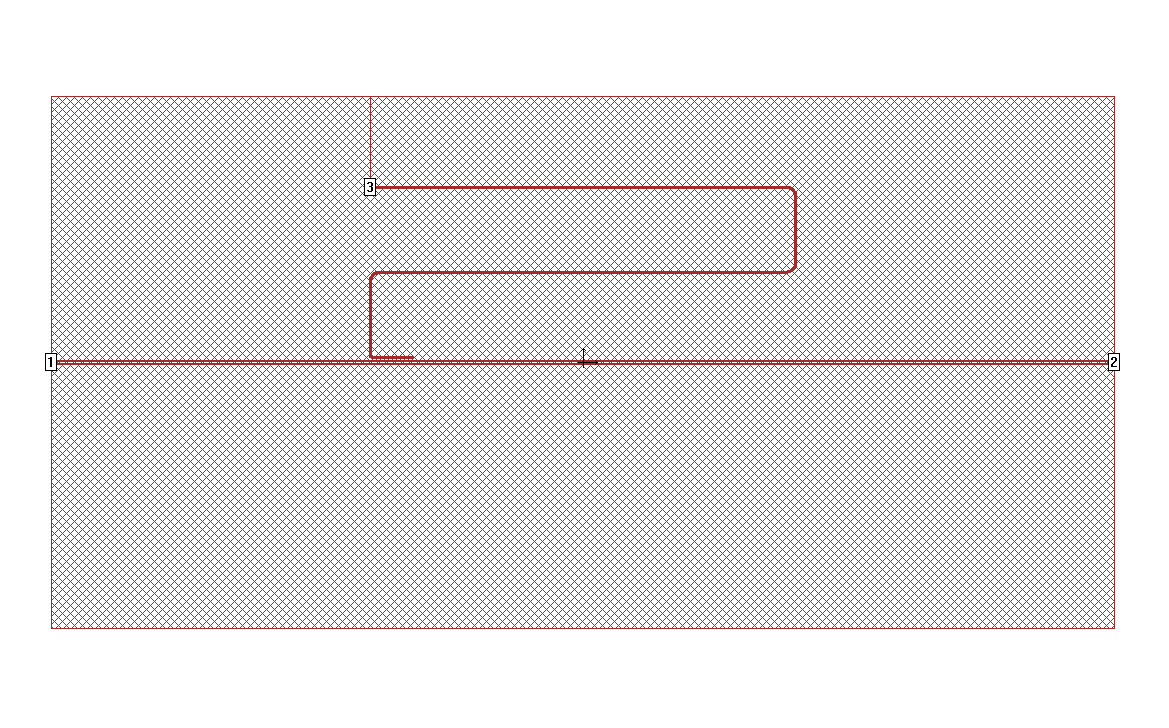

In [2]:
Image(filename='/Users/daniel/Dropbox/multichroic/one_light_lossless_dielectric.png') 

To extract the resonance frequency and quality factor in a reasonable amount of time, we use a technique described in Wisbey et al. JLTP (2014): <a href=http://link.springer.com/article/10.1007%2Fs10909-014-1099-3>New Method for Determining the Quality Factor and Resonance Frequency of Superconducting Micro-Resonators from Sonnet Simulations</a>

The technique involves an internal port in the resonator, in this case port 3, at the shorted end.
Near resonance, the input impedance is given by
$$
Z_{33}(f)
  =
  R [1 + 2 \mathrm{j} Q (f / f_r - 1)].
$$
The resonance frequency is the frequency at which the imaginary part of the input impedance vanishes, and the quality factor can be calculated from the real part and the slope of the imaginary part of the impedance at $f_r$:

\begin{align}
\mathrm{Im} \, Z_{33}(f_r)
  &=
  0; \\
Q
  &=
  \frac{f_r \, \mathrm{d} (\mathrm{Im} \, Z_{33}(f)) / \mathrm{d} f}{2 \mathrm{Re} \, Z_{33}(f_r)}.
\end{align}

In [3]:
# Load data
z = pd.read_csv('/Users/daniel/Dropbox/multichroic/one_light.csv', header=7, delimiter=',')

In [4]:
re_poly = np.polyfit(z.Frequency_GHz, z.REZ33, 2)
im_poly = np.polyfit(z.Frequency_GHz, z.IMZ33, 1)

f_r = -im_poly[1] / im_poly[0]
R = np.polyval(re_poly, f_r)
Q = im_poly[0] * f_r / (2 * R)

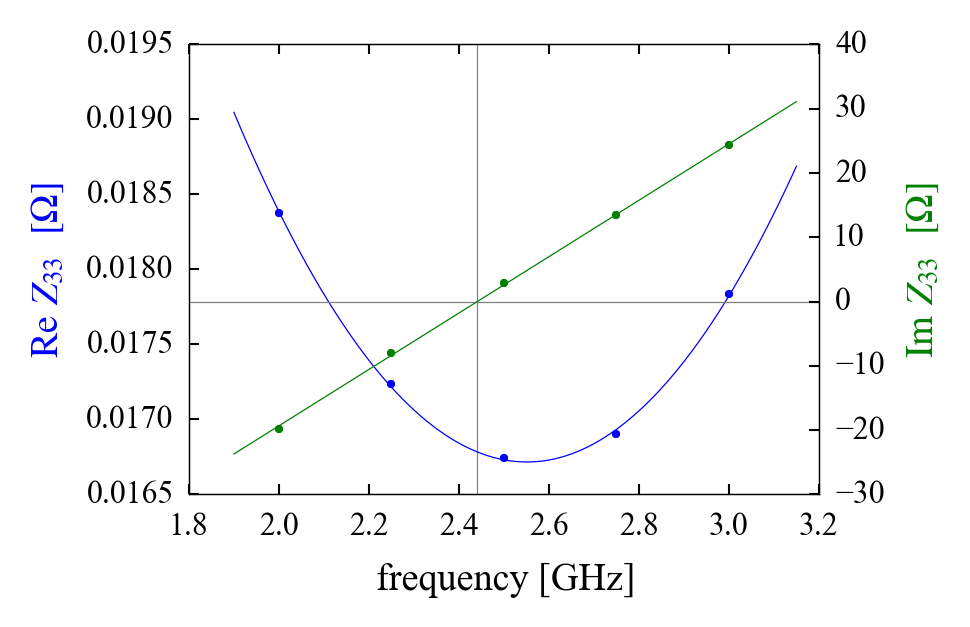

In [5]:
re_color = 'blue'
im_color = 'green'
f_fit = np.linspace(0.95 * z.Frequency_GHz.min(), 1.05 * z.Frequency_GHz.max(), 1e3)
fig, re_ax = plt.subplots()
im_ax = re_ax.twinx()
im_ax.axhline(0, color='gray')
re_ax.axvline(f_r, color='gray')
re_ax.plot(z.Frequency_GHz, z.REZ33, '.', color=re_color, label='re Z33')
re_ax.plot(f_fit, np.polyval(re_poly, f_fit), color=re_color)
im_ax.plot(z.Frequency_GHz, z.IMZ33, '.', color=im_color, label='im Z33')
im_ax.plot(f_fit, np.polyval(im_poly, f_fit), color=im_color)
re_ax.set_xlabel('frequency [GHz]')
re_ax.set_ylabel(r'$\mathrm{Re} \, Z_{33} \; [\Omega]$', color=re_color)
im_ax.set_ylabel(r'$\mathrm{Im} \, Z_{33} \; [\Omega]$', color=im_color);

As shown in the plot above, we fit a line to $\mathrm{Im} \, Z_{33}$ and a quadratic to $\mathrm{Re} \, Z_{33}$ to determine the parameters. The results are

In [6]:
print("Measured resonance f_r = {:.3f} [GHz]".format(f_r))
print("Quality factor Q = {:.0f}".format(Q))

Measured resonance f_r = 2.441 [GHz]
Quality factor Q = 3188


The length of the resonator is $a = 10$ mm. Ignoring kinetic inductance and using a dielectric constant of $\epsilon_r = 11.9$ for silicon would give an expected resonance frequency
$$
f_0 = \frac{c a}{[(1 + \epsilon_r) / 2]^{1/2} 4}
  \approx 3 \, \mathrm{GHz},
$$
or

In [7]:
from scipy.constants import c
a = 10e-3
epsilon_r = 11.9
epsilon_eff = (1 + epsilon_r) / 2
v = c / epsilon_eff**(1/2)
f_0 = v / (4 * a)
print("Expected resonance f_0 = {:.3f} [GHz]".format(1e-9 * f_0))

Expected resonance f_0 = 2.951 [GHz]


We can use this to determine the kinetic inductance fraction
$$
\alpha
  =
  \frac{L_k}{L_g + L_k}
  =
  1 - \left( \frac{f_r}{f_0} \right)^2,
$$
or

In [8]:
alpha = 1 - (1e9 * f_r / f_0)**2
print("kinetic inductance fraction: {:.2f}".format(alpha))

kinetic inductance fraction: 0.32
